In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df=pd.read_csv('retail-sample-1 (1).csv')
df.isnull().sum()

store                    0
sale.date                0
tran.no                  0
tran.type                0
cashier                  0
style                    0
style.desc               0
size                     0
color                    0
class.desc               0
sub.class.desc           0
unit                     0
unit.cost               64
sale.amt                 0
unit.current.retail      0
unit.original.retail     0
dtype: int64

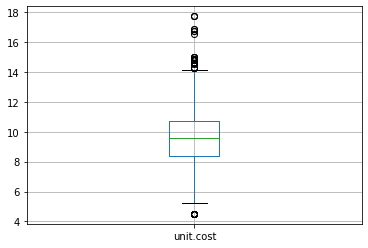

In [112]:
df.boxplot(column=['unit.cost'])
plt.show()

In [113]:
df1=pd.read_csv('retail-sample-2.csv')
df1.isnull().sum()

store                     0
sale.date                 0
tran.no                   0
tran.type                 0
cashier                   0
style                     0
style.desc                0
size                      0
color                     0
class.desc                0
sub.class.desc            0
unit                      0
unit.cost               572
sale.amt                  0
unit.current.retail       0
unit.original.retail      0
dtype: int64

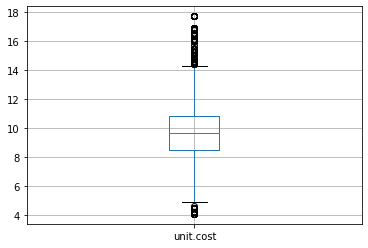

In [114]:
df1.boxplot(column=['unit.cost'])
plt.show()

In [115]:
merged_df = pd.concat([df, df1], axis=0)
Q1 = merged_df['unit.cost'].quantile(0.25)
Q3 = merged_df['unit.cost'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [116]:
outliers = merged_df.loc[(merged_df['unit.cost'] < lower_bound) | (merged_df['unit.cost'] > upper_bound)]

In [117]:
# Print the count of outliers
print('Number of outliers:', len(outliers))

Number of outliers: 569


In [118]:
merged_df.shape

(55445, 16)

In [119]:
merged_df.isna().sum()

store                     0
sale.date                 0
tran.no                   0
tran.type                 0
cashier                   0
style                     0
style.desc                0
size                      0
color                     0
class.desc                0
sub.class.desc            0
unit                      0
unit.cost               636
sale.amt                  0
unit.current.retail       0
unit.original.retail      0
dtype: int64

### Calculate Mean of each type of class and assign individual group mean/median
### Check which group has most missing value

In [120]:
median_unit_cost_subclasswise=merged_df.groupby(['sub.class.desc'])['unit.cost'].median()
median_unit_cost_subclasswise

sub.class.desc
Blouse                     10.1000
Bodysuits                   9.0600
Button Down                 9.8500
Kimono                      9.8500
Long Cardigans             11.8200
Long Sleeve Knits           8.6700
Misc Fashion Tops           5.7500
Pullover Sweater           11.2500
Short Cardigans            12.5600
Short Sleeve Knits          8.1300
Sleeveless Woven Tanks      8.8700
Sweater Tanks and Tanks     9.5889
Sweatshirt                 11.3300
Traditional Cardigan       10.8400
Vest                       11.8200
Name: unit.cost, dtype: float64

In [121]:
mean_unit_cost_subclasswise=merged_df.groupby(['sub.class.desc'])['unit.cost'].mean()
mean_unit_cost_subclasswise

sub.class.desc
Blouse                     10.004369
Bodysuits                   8.956256
Button Down                 9.897298
Kimono                     10.696489
Long Cardigans             11.704310
Long Sleeve Knits           8.877064
Misc Fashion Tops           5.750000
Pullover Sweater           11.098416
Short Cardigans            12.444571
Short Sleeve Knits          8.226013
Sleeveless Woven Tanks      8.656300
Sweater Tanks and Tanks     9.267193
Sweatshirt                 10.842304
Traditional Cardigan       10.738244
Vest                       11.921899
Name: unit.cost, dtype: float64

In [122]:
# group the DataFrame by the category column and count the number of missing values in the value column for each group
missing_counts = merged_df.groupby('sub.class.desc')['unit.cost'].apply(lambda x: x.isna().sum())
missing_counts

sub.class.desc
Blouse                     117
Bodysuits                    9
Button Down                 71
Kimono                       7
Long Cardigans              21
Long Sleeve Knits           23
Misc Fashion Tops            1
Pullover Sweater           101
Short Cardigans             19
Short Sleeve Knits         101
Sleeveless Woven Tanks     118
Sweater Tanks and Tanks     37
Sweatshirt                   5
Traditional Cardigan         2
Vest                         4
Name: unit.cost, dtype: int64

In [123]:
merged_df['unit.cost'] = merged_df.groupby('sub.class.desc')['unit.cost'].transform(lambda x: x.fillna(x.median()))

In [124]:
merged_df.isna().sum()

store                   0
sale.date               0
tran.no                 0
tran.type               0
cashier                 0
style                   0
style.desc              0
size                    0
color                   0
class.desc              0
sub.class.desc          0
unit                    0
unit.cost               0
sale.amt                0
unit.current.retail     0
unit.original.retail    0
dtype: int64

In [125]:
merged_df=merged_df.drop(['style','style.desc'], axis=1)

In [126]:
merged_df['sale.date']=pd.to_datetime(merged_df['sale.date'])

In [127]:
#Extracting date from date and time

merged_df['sale.date'] = merged_df['sale.date'].dt.date

In [128]:
merged_df['gross_margin']=(merged_df['sale.amt']-(merged_df['unit.cost']*merged_df['unit']))/merged_df['sale.amt']

In [129]:
merged_df['cost']=merged_df['unit.cost']*merged_df['unit']

In [130]:
###gross margin by store
profit_storewise = merged_df.groupby(['store'])['sale.amt'].sum() - merged_df.groupby(['store'])['cost'].sum()
profit_storewise

store
3      62901.4159
7     121917.2976
11     68029.8543
13     51317.6990
14    111769.1693
16     66856.5263
19    151730.0080
20    137959.0272
21    105753.9018
27     55966.2688
dtype: float64

In [131]:
sales_storewise=merged_df.groupby(['store'])['sale.amt'].sum()
sales_storewise

store
3     103316.88
7     192465.96
11    110189.71
13     80598.48
14    174763.02
16    103167.93
19    239191.94
20    217038.83
21    164570.02
27     89687.75
Name: sale.amt, dtype: float64

In [246]:
sales_seasonwise=merged_df.groupby('season')['sale.amt'].sum()
sales_seasonwise

season
Fall      468655.23
Spring    349820.50
Summer    396052.00
Winter    260462.79
Name: sale.amt, dtype: float64

In [ ]:
GM_seasonwise=merged_df.groupby('season')['gross_margin'].sum()
GM_seasonwise

In [243]:
sales_storewise_type=merged_df.groupby(['product clearance'])['sale.amt'].sum()
sales_storewise_type

product clearance
0    1286401.09
1     188589.43
Name: sale.amt, dtype: float64

In [245]:
store_21= merged_df[merged_df['store']==21]
store_21

,store,sale.date,tran.no,tran.type,cashier,size,color,class.desc,sub.class.desc,unit,...,unit.original.retail,gross_margin,cost,product clearance,season,numeric_size,numeric_sub_class_desc,numeric_season,labels,Size_XS_XXS
41479,21,2019-01-01,25340,S,1,XXS,Ivory,Fashion Tops,Button Down,1,...,40.0,0.674488,9.8500,0,Winter,6,1,1,0,XXS
41480,21,2019-01-01,25340,S,1,Extra Small,Mustard,Fashion Tops,Short Sleeve Knits,1,...,38.0,0.710508,8.3200,0,Winter,3,3,1,0,XS
41481,21,2019-01-01,25343,S,1,MED,Heather Oat,Fashion Tops,Short Sleeve Knits,1,...,38.0,0.692230,9.1100,0,Winter,1,3,1,0,
41482,21,2019-01-01,25349,S,1,MED,Dark Teal,Fashion Tops,Short Sleeve Knits,1,...,30.0,0.416667,7.6300,1,Winter,1,3,1,0,
41483,21,2019-01-01,25349,S,1,MED,Dark Teal,"Cardigans,Wraps,Sweaters",Long Cardigans,1,...,38.0,0.212358,11.0900,1,Winter,1,9,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47499,21,2019-12-31,45396,S,1,XXS,Navy,Fashion Tops,Short Sleeve Knits,1,...,34.0,0.531532,9.3600,1,Fall,6,3,4,0,XXS
47500,21,2019-12-31,45405,S,1,LG,Ivory,"Cardigans,Wraps,Sweaters",Pullover Sweater,1,...,48.0,0.735192,9.5331,0,Fall,4,6,4,1,
47501,21,2019-12-31,45405,S,1,LG,Gray,Fashion Tops,Sweatshirt,1,...,48.0,0.685278,11.3300,0,Fall,4,14,4,1,
47502,21,2019-12-31,45407,S,1,SM,Blush,"Cardigans,Wraps,Sweaters",Pullover Sweater,1,...,48.0,0.703482,8.8896,1,Fall,2,6,4,1,


In [240]:
gross_margin_storewise = profit_storewise / sales_storewise
results_df = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df['gross_margin'] = gross_margin_storewise

# add the store column to the DataFrame
results_df['store'] = profit_storewise.index

results_df

,gross_margin,store
store,,
3,0.608820,3
7,0.633449,7
11,0.617388,11
13,0.636708,13
14,0.639547,14
16,0.648036,16
19,0.634344,19
20,0.635642,20
21,0.642607,21


In [133]:
###gross margin by product class
profit_productclass_wise = merged_df.groupby(['class.desc'])['sale.amt'].sum() - merged_df.groupby(['class.desc'])['cost'].sum()
profit_productclass_wise
sales_per_class=merged_df.groupby(['class.desc'])['sale.amt'].sum()
sales_per_class
gross_margin_pclass_wise = profit_productclass_wise / sales_per_class
results_df1 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df1['gross_margin'] = gross_margin_pclass_wise

# add the store column to the DataFrame
results_df1['class.desc'] = profit_productclass_wise.index

print(results_df1)

                          gross_margin                class.desc
class.desc                                                      
Cardigans,Wraps,Sweaters      0.625601  Cardigans,Wraps,Sweaters
Fashion Tops                  0.636779              Fashion Tops


In [134]:
###gross margin by product colorwise
profit_productcolor_wise = merged_df.groupby(['color'])['sale.amt'].sum() - merged_df.groupby(['color'])['cost'].sum()
profit_productcolor_wise
sales_per_color=merged_df.groupby(['color'])['sale.amt'].sum()
sales_per_color
gross_margin_color_wise = profit_productcolor_wise / sales_per_color
results_df2 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df2['gross_margin'] = gross_margin_color_wise

# add the store column to the DataFrame
results_df2['color'] = profit_productcolor_wise.index

results_df2.sort_values('gross_margin', ascending=False)

,gross_margin,color
color,,
Dark Rose,0.809060,Dark Rose
Topaz,0.800972,Topaz
No Color,0.747500,No Color
Yellow,0.745763,Yellow
Banana,0.744733,Banana
...,...,...
Dark Teal,0.254326,Dark Teal
Light Rose,0.243299,Light Rose
Mint,0.231860,Mint


In [135]:
###gross margin by product subclass

profit_subclass_wise = merged_df.groupby(['sub.class.desc'])['sale.amt'].sum() - merged_df.groupby(['sub.class.desc'])['cost'].sum()
profit_subclass_wise
sales_subclasswise=merged_df.groupby(['sub.class.desc'])['sale.amt'].sum()
sales_subclasswise
gross_margin_subclass_wise = profit_subclass_wise / sales_subclasswise
count1=merged_df.groupby(['sub.class.desc'])['sale.amt'].count()
total_units_sold = merged_df['sale.amt'].count()
perc_transaction=round(count1/total_units_sold *100,2)
results_df3 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df3['gross_margin'] = gross_margin_subclass_wise

#add the count of units sold
results_df3['No. of units sold'] = count1

#add the percent of units sold
results_df3['Perc. of units sold'] = perc_transaction

# add the store column to the DataFrame
results_df3['sub_class'] = profit_subclass_wise.index

results_df3.sort_values('gross_margin', ascending=False)

,gross_margin,No. of units sold,Perc. of units sold,sub_class
sub.class.desc,,,,
Sweater Tanks and Tanks,0.676506,1707,3.08,Sweater Tanks and Tanks
Kimono,0.667929,457,0.82,Kimono
Sleeveless Woven Tanks,0.659874,7882,14.22,Sleeveless Woven Tanks
Button Down,0.653293,6925,12.49,Button Down
Short Sleeve Knits,0.646518,10220,18.43,Short Sleeve Knits
Pullover Sweater,0.627983,8944,16.13,Pullover Sweater
Traditional Cardigan,0.623431,281,0.51,Traditional Cardigan
Long Sleeve Knits,0.621562,2948,5.32,Long Sleeve Knits
Bodysuits,0.618602,439,0.79,Bodysuits


In [136]:
profit_store_subclass_wise = merged_df.groupby(['store','sub.class.desc'])['sale.amt'].sum() - merged_df.groupby(['store','sub.class.desc'])['cost'].sum()
profit_store_subclass_wise


store  sub.class.desc         
3      Blouse                     14594.3538
       Bodysuits                    497.6900
       Button Down                 9675.7367
       Kimono                      1031.0500
       Long Cardigans               971.2256
                                     ...    
27     Sleeveless Woven Tanks      7036.5749
       Sweater Tanks and Tanks     1692.6201
       Sweatshirt                   860.2667
       Traditional Cardigan         239.2700
       Vest                          62.3300
Length: 142, dtype: float64

In [137]:
sales_store_subclasswise=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].sum()
sales_store_subclasswise
gross_margin_store_subclass_wise = profit_store_subclass_wise / sales_store_subclasswise
count2=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].count()


In [138]:
results_df4 = pd.DataFrame()

# add the store column to the DataFrame
results_df4['profit'] = profit_store_subclass_wise

# add the count column to the DataFrame
results_df4['No. of units sold'] = count2

# add the gross margin column to the DataFrame
results_df4['gross_margin'] = gross_margin_store_subclass_wise




print(results_df4)

                                   profit  No. of units sold  gross_margin
store sub.class.desc                                                      
3     Blouse                   14594.3538                959      0.602983
      Bodysuits                  497.6900                 38      0.588947
      Button Down               9675.7367                553      0.636788
      Kimono                    1031.0500                 52      0.652543
      Long Cardigans             971.2256                 76      0.519025
...                                   ...                ...           ...
27    Sleeveless Woven Tanks    7036.5749                414      0.664290
      Sweater Tanks and Tanks   1692.6201                 88      0.659685
      Sweatshirt                 860.2667                 58      0.577414
      Traditional Cardigan       239.2700                 15      0.594194
      Vest                        62.3300                  3      0.637386

[142 rows x 3 columns]


In [139]:
top3_df = results_df4.groupby(['store']).apply(lambda x: x.nlargest(3, 'gross_margin')).reset_index(level=1, drop=True).reset_index()
top3_df

,store,sub.class.desc,profit,No. of units sold,gross_margin
0,3,Sweater Tanks and Tanks,2172.9292,116,0.674749
1,3,Kimono,1031.0500,52,0.652543
2,3,Button Down,9675.7367,553,0.636788
3,7,Button Down,14939.0542,787,0.659685
4,7,Sleeveless Woven Tanks,17216.4066,1031,0.659673
5,7,Sweater Tanks and Tanks,3192.1888,178,0.657365
6,11,Kimono,625.2600,26,0.681371
7,11,Sleeveless Woven Tanks,8566.5931,498,0.663338
8,11,Sweater Tanks and Tanks,1632.6528,92,0.655589
9,13,Kimono,406.6700,17,0.691098


In [140]:
bottom3_df = results_df4.groupby(['store']).apply(lambda x: x.nsmallest(3, 'gross_margin')).reset_index(level=1, drop=True).reset_index()
bottom3_df

,store,sub.class.desc,profit,No. of units sold,gross_margin
0,3,Vest,41.1100,14,0.197692
1,3,Traditional Cardigan,178.0500,17,0.491444
2,3,Long Cardigans,971.2256,76,0.519025
3,7,Vest,85.3100,11,0.392014
4,7,Short Cardigans,3981.0773,249,0.561360
5,7,Sweatshirt,1031.8250,74,0.568176
6,11,Vest,91.9600,10,0.436160
7,11,Sweatshirt,844.7148,60,0.556752
8,11,Blouse,13808.2174,961,0.585576
9,13,Vest,3.4000,1,0.213836


In [250]:
#Top 5 items saleswise in each store
sales_store_subclasswise=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].sum()
count3=merged_df.groupby(['store','sub.class.desc'])['sale.amt'].count()
store_count=merged_df.groupby(['store'])['sale.amt'].count()
perc=round((count3/store_count)*100,2)           
results_df5 = pd.DataFrame()

# add the sales column to the DataFrame
results_df5['sales'] = sales_store_subclasswise
results_df5['Units sold'] = count3
results_df5['Percent_of_store_units_sold'] = perc
results_df5

sales  Units sold  \
store sub.class.desc                                  
3     Blouse                   24203.61         959   
      Bodysuits                  845.05          38   
      Button Down              15194.59         553   
      Kimono                    1580.05          52   
      Long Cardigans            1871.25          76   
...                                 ...         ...   
27    Sleeveless Woven Tanks   10592.62         414   
      Sweater Tanks and Tanks   2565.80          88   
      Sweatshirt                1489.86          58   
      Traditional Cardigan       402.68          15   
      Vest                        97.79           3   

                               Percent_of_store_units_sold  
store sub.class.desc                                        
3     Blouse                                         23.11  
      Bodysuits                                       0.92  
      Button Down                                    13.33  
      Kimono                                          1.25  
      Long Cardigans                                  1.83  
...                                                    ...  
27    Sleeveless Woven Tanks                         12.09  
      Sweater Tanks and Tanks                         2.57  
      Sweatshirt                                      1.69  
      Traditional Cardigan                            0.44  
      Vest                                            0.09  

[142 rows x 3 columns]

In [142]:
store_count

store
3     4149
7     7246
11    4217
13    2910
14    6519
16    3787
19    9036
20    8133
21    6025
27    3423
Name: sale.amt, dtype: int64

In [143]:
top5_df = results_df5.groupby(['store']).apply(lambda x: x.nlargest(5, 'sales')).reset_index(level=1, drop=True).reset_index()
top5_df

,store,sub.class.desc,sales,Units sold,Percent_of_store_units_sold
0,3,Blouse,24203.61,959,23.11
1,3,Pullover Sweater,16104.40,580,13.98
2,3,Sleeveless Woven Tanks,15916.28,694,16.73
3,3,Button Down,15194.59,553,13.33
4,3,Short Sleeve Knits,14664.77,676,16.29
5,7,Blouse,41477.43,1590,21.94
6,7,Pullover Sweater,40637.30,1338,18.47
7,7,Short Sleeve Knits,30475.53,1328,18.33
8,7,Sleeveless Woven Tanks,26098.39,1031,14.23
9,7,Button Down,22645.74,787,10.86


In [254]:
import pandas as pd

# Group the data by "store" and "sub.class.desc", and sum the "sales" column
grouped = merged_df.groupby(['store', 'sub.class.desc']).sum().reset_index()

# Calculate the total sales for each store
total_sales = grouped.groupby('store')['sale.amt'].transform('sum')

# Calculate the percentage of sales for each category in each store
grouped['percentage'] = grouped['sale.amt'] / total_sales * 100

# Filter the data to only include the "blouse" and "short.sleeve.knits" categories
filtered = grouped[grouped['sub.class.desc'].isin(['Blouse', 'Short Sleeve Knits'])]

# Pivot the data to have the categories as columns and the stores as rows
pivoted = filtered.pivot(index='store', columns='sub.class.desc', values='percentage')

# Rename the columns to remove the dot notation
pivoted.columns = [col.replace('.', '_') for col in pivoted.columns]

# Display the result
print(pivoted)


          Blouse  Short Sleeve Knits
store                               
3      23.426579           14.193973
7      21.550528           15.834244
11     21.399993           12.630181
13     20.370508           10.337552
14     26.387070           13.094904
16     19.668001           16.470428
19     16.928112           20.041461
20     17.024539           17.134533
21     15.219765           17.738480
27     15.289557           18.878966


In [144]:
#Flagging the items that are going on clearance sale
merged_df['product clearance'] = merged_df['unit.current.retail'].apply(lambda x: 1 if str(x)[-2:] == '97' or str(x)[-2:] == '98' else 0)

In [145]:
merged_df['product clearance']

0        0
1        0
2        1
3        1
4        1
        ..
50922    1
50923    1
50924    0
50925    0
50926    0
Name: product clearance, Length: 55445, dtype: int64

In [146]:
merged_df['product clearance'].value_counts()

0    44106
1    11339
Name: product clearance, dtype: int64

In [239]:
storewise_clearance=merged_df.groupby(['store'])['product clearance'].sum()

storewise_clearance_perc=round(storewise_clearance/store_count*100,2)
storewise_clearance_perc

store
3     30.59
7     18.69
11    22.22
13    19.76
14    20.23
16    18.06
19    24.68
20    18.50
21    11.20
27    23.11
dtype: float64

In [234]:
storecount_sizewise=merged_df.groupby(['store','size']).sum()
storecount_sizewise.sort_values('product clearance', ascending=False)
storecount_sizewise.to_csv('size_summary.csv')

In [237]:
# Create a dictionary to map the sizes to XS or XXS
size_mapping = {'Extra Small': 'XS', 'LG': '', 'M/L': '', 'MED': '', 'S/M': '', 'SM': '', 'XL': '', 'XXS': 'XXS'}

# Map the sizes to XS or XXS using the size_mapping dictionary
merged_df['Size_XS_XXS'] = merged_df['size'].map(size_mapping)

# Define the size categories to group by
size_categories = ['Size_XS_XXS']

# Group the data by store and sum the XS and XXS size columns
grouped_data = merged_df.groupby('store')[size_categories].apply(lambda x: x.eq('XXS').sum() + x.eq('XS').sum())

# Calculate the total for each store
store_totals = store_count

# Calculate the percentage of each size for each store
size_percentages = grouped_data.divide(store_totals, axis=0) * 100

# Print the result
print(size_percentages)


       Size_XS_XXS
store             
3        15.063871
7        12.820867
11       13.042447
13       12.061856
14       15.431815
16       15.104304
19       15.825587
20       14.508791
21       13.809129
27       13.292434


In [148]:
merged_df.columns

Index(['store', 'sale.date', 'tran.no', 'tran.type', 'cashier', 'size',
       'color', 'class.desc', 'sub.class.desc', 'unit', 'unit.cost',
       'sale.amt', 'unit.current.retail', 'unit.original.retail',
       'gross_margin', 'cost', 'product clearance'],
      dtype='object')

In [149]:
merged_df.head()

,store,sale.date,tran.no,tran.type,cashier,size,color,class.desc,sub.class.desc,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance
0,19,2019-01-01,15553,S,2,MED,Ivory,Fashion Tops,Button Down,1,9.70,31.49,40.00,40.0,0.691966,9.70,0
1,19,2019-01-01,15555,S,2,SM,FOREST GREEN,Fashion Tops,Blouse,1,8.37,48.00,48.00,48.0,0.825625,8.37,0
2,19,2019-01-01,15557,S,2,MED,Black,Fashion Tops,Blouse,1,9.60,12.75,21.98,40.0,0.247059,9.60,1
3,19,2019-01-01,15557,S,2,MED,Ivory,Fashion Tops,Blouse,1,11.23,16.23,27.98,44.0,0.308071,11.23,1
4,19,2019-01-01,15561,S,2,Extra Small,Ivory,Fashion Tops,Blouse,1,11.23,14.95,27.98,44.0,0.248829,11.23,1


In [150]:
import pandas as pd

# Convert the 'open_dt' column to a datetime object
merged_df['sale.date'] = pd.to_datetime(merged_df['sale.date'])

# Create a dictionary mapping each season to its start and end dates
seasons = {
    'Winter': {'start': pd.to_datetime('2019-01-01'), 'end': pd.to_datetime('2019-03-20')},
    'Spring': {'start': pd.to_datetime('2019-03-21'), 'end': pd.to_datetime('2019-06-20')},
    'Summer': {'start': pd.to_datetime('2019-06-21'), 'end': pd.to_datetime('2019-09-23')},
    'Fall': {'start': pd.to_datetime('2019-09-24'), 'end': pd.to_datetime('2019-12-31')}
}

# Define a function to assign the season based on the start date
def assign_season(row):
    for season, dates in seasons.items():
        if row['sale.date'] >= dates['start'] and row['sale.date'] <= dates['end']:
            return season

# Create a new column 'season' using the assign_season function
merged_df['season'] = merged_df.apply(assign_season, axis=1)

In [151]:
merged_df['season'].value_counts()

Fall      17815
Summer    14470
Spring    13428
Winter     9732
Name: season, dtype: int64

In [152]:
###gross margin seasonwise

profit_season_wise = merged_df.groupby(['season'])['sale.amt'].sum() - merged_df.groupby(['season'])['cost'].sum()
profit_season_wise
sales_season_wise=merged_df.groupby(['season'])['sale.amt'].sum()
sales_season_wise
gross_margin_season_wise = profit_season_wise / sales_season_wise
results_df6 = pd.DataFrame()

# add the gross margin column to the DataFrame
results_df6['gross_margin'] = gross_margin_season_wise

print(results_df6)

        gross_margin
season              
Fall        0.611492
Spring      0.633996
Summer      0.665538
Winter      0.622928


In [153]:
season_wise_clearance=merged_df.groupby(['season'])['product clearance'].sum()
season_wise_clearance

season
Fall      2390
Spring    3962
Summer    2259
Winter    2728
Name: product clearance, dtype: int64

In [217]:
season_wise_storewise_clearance=merged_df.groupby(['season','store'])['product clearance'].sum()
season_wise_storewise_clearance
total_clearance_each_season=merged_df.groupby(['season'])['product clearance'].sum()
perc_clearance_seasonwise=season_wise_storewise_clearance/total_clearance_each_season*100
perc_clearance_seasonwise

season  store
Fall    3        14.518828
        7        11.129707
        11        8.995816
        13        3.430962
        14       15.523013
        16        4.686192
        19       15.564854
        20       13.556485
        21        6.150628
        27        6.443515
Spring  3        10.121151
        7        10.146391
        11        7.218576
        13        8.101969
        14       10.752145
        16        7.521454
        19       21.049975
        20       12.342251
        21        4.921757
        27        7.824331
Summer  3        14.519699
        7        15.714918
        11        9.384683
        13        2.257636
        14       12.616202
        16        4.205401
        19       14.431164
        20       15.095175
        21        5.976096
        27        5.799026
Winter  3         7.074780
        7        12.133431
        11        8.211144
        13        4.435484
        14        8.687683
        16        6.561584
        19    

In [155]:
import seaborn as sns

In [156]:
df = season_wise_storewise_clearance.reset_index()

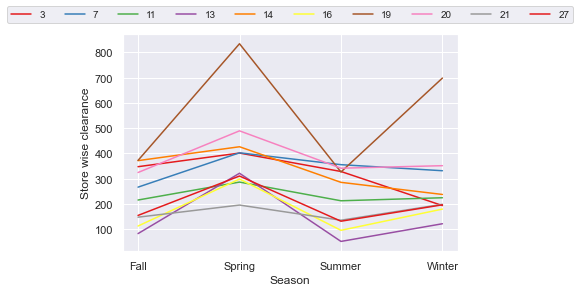

In [157]:
sns.set(style="darkgrid")
sns.lineplot(data=df, x="season", y="product clearance", hue="store", palette="Set1")

plt.xlabel("Season")
plt.ylabel("Store wise clearance")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(df['store'].unique()), fontsize='small')

In [158]:
merged_df.head()

,store,sale.date,tran.no,tran.type,cashier,size,color,class.desc,sub.class.desc,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance,season
0,19,2019-01-01,15553,S,2,MED,Ivory,Fashion Tops,Button Down,1,9.70,31.49,40.00,40.0,0.691966,9.70,0,Winter
1,19,2019-01-01,15555,S,2,SM,FOREST GREEN,Fashion Tops,Blouse,1,8.37,48.00,48.00,48.0,0.825625,8.37,0,Winter
2,19,2019-01-01,15557,S,2,MED,Black,Fashion Tops,Blouse,1,9.60,12.75,21.98,40.0,0.247059,9.60,1,Winter
3,19,2019-01-01,15557,S,2,MED,Ivory,Fashion Tops,Blouse,1,11.23,16.23,27.98,44.0,0.308071,11.23,1,Winter
4,19,2019-01-01,15561,S,2,Extra Small,Ivory,Fashion Tops,Blouse,1,11.23,14.95,27.98,44.0,0.248829,11.23,1,Winter


In [159]:
merged_df.to_csv('/Users/buzz/Downloads/Business Modelling Project/cleaned_data.csv')

In [192]:
df_logistic=merged_df.drop(['sale.date', 'tran.no', 'tran.type', 'cashier','class.desc','unit','unit.cost','color'
              ],axis=1)

### Logistic regression on combined data

In [195]:
df_logistic=pd.get_dummies(df_logistic, drop_first=True)



In [196]:
df_logistic

,store,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance,numeric_size,numeric_sub_class_desc,numeric_season,...,sub.class.desc_Short Cardigans,sub.class.desc_Short Sleeve Knits,sub.class.desc_Sleeveless Woven Tanks,sub.class.desc_Sweater Tanks and Tanks,sub.class.desc_Sweatshirt,sub.class.desc_Traditional Cardigan,sub.class.desc_Vest,season_Spring,season_Summer,season_Winter
0,19,31.49,40.00,40.0,0.691966,9.70,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,19,48.00,48.00,48.0,0.825625,8.37,0,2,2,1,...,0,0,0,0,0,0,0,0,0,1
2,19,12.75,21.98,40.0,0.247059,9.60,1,1,2,1,...,0,0,0,0,0,0,0,0,0,1
3,19,16.23,27.98,44.0,0.308071,11.23,1,1,2,1,...,0,0,0,0,0,0,0,0,0,1
4,19,14.95,27.98,44.0,0.248829,11.23,1,3,2,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50922,27,29.98,29.98,44.0,0.690460,9.28,1,2,6,4,...,0,0,0,0,0,0,0,0,0,0
50923,27,29.98,29.98,44.0,0.622081,11.33,1,1,8,4,...,1,0,0,0,0,0,0,0,0,0
50924,27,44.00,44.00,44.0,0.753636,10.84,0,2,6,4,...,0,0,0,0,0,0,0,0,0,0
50925,27,29.19,38.00,38.0,0.693046,8.96,0,4,2,4,...,0,0,0,0,0,0,0,0,0,0


In [233]:
x=df_logistic.drop(['product clearance','numeric_size','numeric_sub_class_desc','numeric_season','sale.amt','unit.current.retail','gross_margin'],axis=1)
y=df_logistic['product clearance']

##train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=101)

In [238]:
x_train.head()

,store,unit.original.retail,cost,labels,size_LG,size_M/L,size_MED,size_No Size,size_S/M,size_SM,...,sub.class.desc_Short Cardigans,sub.class.desc_Short Sleeve Knits,sub.class.desc_Sleeveless Woven Tanks,sub.class.desc_Sweater Tanks and Tanks,sub.class.desc_Sweatshirt,sub.class.desc_Traditional Cardigan,sub.class.desc_Vest,season_Spring,season_Summer,season_Winter
32199,19,54.0,12.31,3,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21446,14,40.0,7.39,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6709,7,38.0,10.19,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
38879,20,48.0,13.00,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13455,11,28.0,6.16,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [242]:
'''Implementing the logistic regression model'''

from sklearn.linear_model import LogisticRegression #import
logmodel=LogisticRegression(solver='liblinear') #initialize
logmodel.fit(x_train,y_train)#fit

logmodel.intercept_ #bo
logmodel.coef_ #b1

probabilities=logmodel.predict_proba(x_test)
y_pred=logmodel.predict(x_test)


##evaluate the model using f1-score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.10373555495834452

In [205]:
from scipy.stats import norm
import numpy as np
# create a DataFrame to store the feature names, coefficients, and p-values
coef_df = pd.DataFrame({'feature': x.columns, 'coefficient': logmodel.coef_[0]})

# calculate the p-values for each coefficient using the normal distribution
coef_df['p-value'] = [2 * (1 - norm.cdf(np.abs(x))) for x in logmodel.coef_[0]]

# print the coefficients, p-values, and significance levels (alpha=0.05) next to the feature names
for idx, row in coef_df.iterrows():
    if row['p-value'] < 0.05:
        signif = '*'
    else:
        signif = ''
    print(f"{row['feature']}: {row['coefficient']:.3f} (p-value={row['p-value']:.3f}{signif})")

store: -0.021 (p-value=0.983)
sale.amt: -0.203 (p-value=0.839)
unit.current.retail: -0.575 (p-value=0.565)
unit.original.retail: 0.513 (p-value=0.608)
gross_margin: 3.264 (p-value=0.001*)
cost: 0.166 (p-value=0.868)
labels: 0.207 (p-value=0.836)
size_LG: -0.096 (p-value=0.924)
size_M/L: -0.196 (p-value=0.845)
size_MED: -0.108 (p-value=0.914)
size_No Size: 0.000 (p-value=1.000)
size_S/M: 0.051 (p-value=0.959)
size_SM: -0.282 (p-value=0.778)
size_XL: -0.078 (p-value=0.938)
size_XXS: 0.350 (p-value=0.726)
sub.class.desc_Bodysuits: -0.140 (p-value=0.888)
sub.class.desc_Button Down: 0.161 (p-value=0.872)
sub.class.desc_Kimono: -1.365 (p-value=0.172)
sub.class.desc_Long Cardigans: -0.679 (p-value=0.497)
sub.class.desc_Long Sleeve Knits: -0.479 (p-value=0.632)
sub.class.desc_Misc Fashion Tops: 0.000 (p-value=1.000)
sub.class.desc_Pullover Sweater: -1.039 (p-value=0.299)
sub.class.desc_Short Cardigans: -0.321 (p-value=0.748)
sub.class.desc_Short Sleeve Knits: -0.080 (p-value=0.936)
sub.class.d

In [243]:

#Using the confusion matrix
from sklearn.metrics import (accuracy_score, precision_score,recall_score,f1_score
                             ,confusion_matrix)
confusion_mat = pd.DataFrame(confusion_matrix(y_test,y_pred), 
                             index = ['Actual:0', 'Actual:1'],
                             columns = ['Pred:0', 'Pred:1'])

confusion_mat


,Pred:0,Pred:1
Actual:0,13106,99
Actual:1,3236,193


In [244]:
accuracy_score(y_test,y_pred)

0.799507033786221

In [245]:
precision_score(y_test,y_pred)

0.660958904109589

In [246]:
recall_score(y_test,y_pred)

0.056284631087780694